## Acquire & Summarize


Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.
Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.
Only include properties that include a latitude and longitude value.

In [1]:
import os
import pandas as pd
import env
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from env import user, password, host


database_url_base = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/'


def get_zillow_data(use_cache=True):
    if os.path.exists('zillow.csv') and use_cache:
        print('Using cached csv')
        df = pd.read_csv('zillow.csv')
       
        return df
    
    
    print('Acquiring data from SQL database')
    query = """SELECT prop.*, 
       pred.logerror, 
       pred.transactiondate, 
       air.airconditioningdesc, 
       arch.architecturalstyledesc, 
       build.buildingclassdesc, 
       heat.heatingorsystemdesc, 
       landuse.propertylandusedesc, 
       story.storydesc, 
       construct.typeconstructiondesc 
       FROM   properties_2017 prop  
       INNER JOIN (SELECT parcelid,logerror,
                          Max(transactiondate) transactiondate 
                   FROM   predictions_2017 
                   GROUP  BY parcelid, logerror) pred
               USING (parcelid) 
       LEFT JOIN airconditioningtype air USING (airconditioningtypeid) 
       LEFT JOIN architecturalstyletype arch USING (architecturalstyletypeid) 
       LEFT JOIN buildingclasstype build USING (buildingclasstypeid) 
       LEFT JOIN heatingorsystemtype heat USING (heatingorsystemtypeid) 
       LEFT JOIN propertylandusetype landuse USING (propertylandusetypeid) 
       LEFT JOIN storytype story USING (storytypeid) 
       LEFT JOIN typeconstructiontype construct USING (typeconstructiontypeid) 
        WHERE  prop.latitude IS NOT NULL 
       AND prop.longitude IS NOT NULL AND transactiondate <= '2017-12-31' 
"""
    df = pd.read_sql(query, database_url_base + 'zillow')
    df.to_csv('zillow.csv', index=False)
   
    return df

In [2]:
df = get_zillow_data()

Using cached csv


/var/folders/qc/j1gjctrd2wn6_hlqm7vyzbgm0000gn/T/ipykernel_4316/1979247754.py:1: DtypeWarning: Columns (63) have mixed types.Specify dtype option on import or set low_memory=False.
  df = get_zillow_data()


In [3]:
# look at number of nulls for each column
df.isnull().sum()

id                              0
parcelid                        0
airconditioningtypeid       52568
architecturalstyletypeid    77368
basementsqft                77524
                            ...  
buildingclassdesc           77559
heatingorsystemdesc         28005
propertylandusedesc             0
storydesc                   77524
typeconstructiondesc        77352
Length: 68, dtype: int64

## Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77574 entries, 0 to 77573
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77574 non-null  int64  
 1   parcelid                      77574 non-null  int64  
 2   airconditioningtypeid         25006 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77574 non-null  float64
 6   bedroomcnt                    77574 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49808 non-null  float64
 9   calculatedbathnbr             76959 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  finishedfloor1squarefeet      6035 non-null   float64
 12  calculatedfinishedsquarefeet  77374 non-null  float64
 13  f

In [5]:
df.shape

(77574, 68)

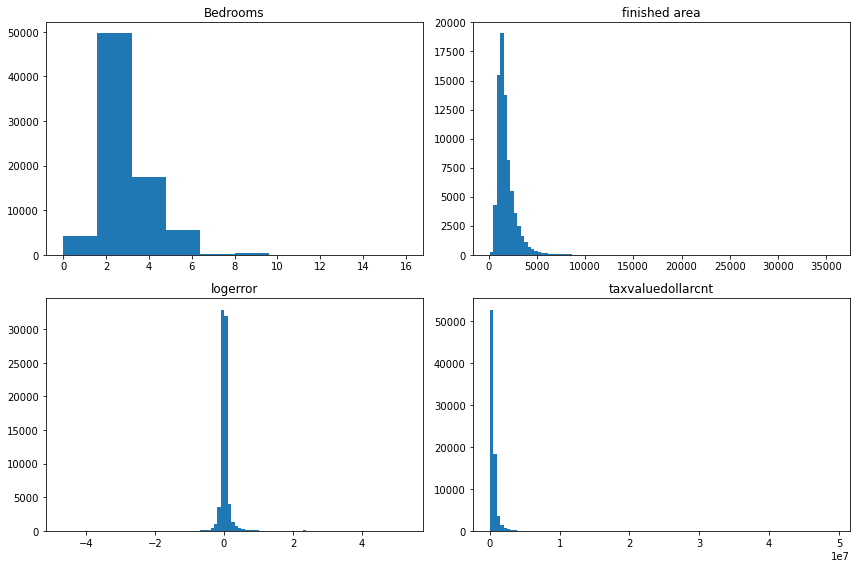

In [6]:
# plot some distributions 

plt.figure(figsize = (12,8))
plt.subplot(221)
plt.hist(df.bedroomcnt, bins = 10)
plt.title('Bedrooms')



plt.subplot(222)
plt.hist(df.calculatedfinishedsquarefeet, bins = 100)
plt.title('finished area')



plt.subplot(223)
plt.hist(df.logerror, bins = 100)
plt.title('logerror')



plt.subplot(224)
plt.hist(df.taxvaluedollarcnt, bins = 100)
plt.title('taxvaluedollarcnt')

plt.tight_layout();

## Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [7]:
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    pct_missing = num_missing / rows
    cols_missing = pd.DataFrame({'number_missing_rows': num_missing, 'percent_rows_missing': pct_missing})
    return cols_missing

In [8]:
nulls_by_column = nulls_by_col(df)
nulls_by_column.sort_values(by="percent_rows_missing", ascending=False).head(40)

,number_missing_rows,percent_rows_missing
buildingclassdesc,77559,0.999807
buildingclasstypeid,77559,0.999807
finishedsquarefeet13,77532,0.999459
storytypeid,77524,0.999355
basementsqft,77524,0.999355
storydesc,77524,0.999355
yardbuildingsqft26,77504,0.999098
fireplaceflag,77402,0.997783
architecturalstyletypeid,77368,0.997344
architecturalstyledesc,77368,0.997344


## Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [9]:
pd.DataFrame(df.isnull().sum(axis =1).value_counts()).reset_index()

,index,0
0,33,14817
1,34,13356
2,32,12606
3,31,9911
4,36,5793
5,29,5285
6,35,5163
7,37,3630
8,30,3465
9,38,1932


In [10]:
df2 = pd.DataFrame(df.isnull().sum(axis =1), columns = ['num_cols_missing']).reset_index().groupby('num_cols_missing')\
.count().reset_index().rename(columns = {'index': 'num_rows'})

df2['pct_cols_missing'] = df2.num_cols_missing/df.shape[1]
df2.head()

,num_cols_missing,num_rows,pct_cols_missing
0,23,2,0.338235
1,24,13,0.352941
2,25,24,0.367647
3,26,65,0.382353
4,27,316,0.397059


In [11]:
def cols_missing(df):
    df2 = pd.DataFrame(df.isnull().sum(axis =1), columns = ['num_cols_missing']).reset_index()\
    .groupby('num_cols_missing').count().reset_index().\
    rename(columns = {'index': 'num_rows' })
    df2['pct_cols_missing'] = df2.num_cols_missing/df.shape[1]
    return df2

In [12]:
# sort valyes by pc_col_missing
cols_missing(df).sort_values(by = ['pct_cols_missing'], ascending = False)


,num_cols_missing,num_rows,pct_cols_missing
25,48,3,0.705882
24,47,3,0.691176
23,46,5,0.676471
22,45,50,0.661765
21,44,79,0.647059
20,43,29,0.632353
19,42,26,0.617647
18,41,29,0.602941
17,40,230,0.588235
16,39,285,0.573529


# Prepare

## Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [13]:
# Restrict df to only properties that meet single unit criteria

single_use = [261, 262, 263, 264, 266, 268, 273, 276, 279]
df = df[df.propertylandusetypeid.isin(single_use)]
    
    
# Restrict df to only those properties with at least 1 bath & bed and >350 sqft area
df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull()) & (df.calculatedfinishedsquarefeet>350)]

In [14]:
# check # of columns and rows left
df.shape

(71355, 68)

## Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

In [15]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .70):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [16]:
# use the function defined above:

df = handle_missing_values(df)

In [17]:
# check shape to see how many columns and rows were dropped

df.shape

(71355, 34)

In [18]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71355 entries, 0 to 77573
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            71355 non-null  int64  
 1   parcelid                      71355 non-null  int64  
 2   bathroomcnt                   71355 non-null  float64
 3   bedroomcnt                    71355 non-null  float64
 4   buildingqualitytypeid         44841 non-null  float64
 5   calculatedbathnbr             71340 non-null  float64
 6   calculatedfinishedsquarefeet  71355 non-null  float64
 7   finishedsquarefeet12          71188 non-null  float64
 8   fips                          71355 non-null  float64
 9   fullbathcnt                   71340 non-null  float64
 10  heatingorsystemtypeid         46412 non-null  float64
 11  latitude                      71355 non-null  float64
 12  longitude                     71355 non-null  float64
 13  l

In [19]:
cols_to_remove = ['id',
       'calculatedbathnbr', 'finishedsquarefeet12', 'fullbathcnt', 'heatingorsystemtypeid'
       ,'propertycountylandusecode', 'propertylandusetypeid','propertyzoningdesc', 
        'censustractandblock', 'propertylandusedesc', 'unitcnt',"buildingqualitytypeid",'heatingorsystemdesc']


In [20]:
def remove_columns(df, cols_to_remove):  
    df = df.drop(columns=cols_to_remove)
    return df

In [21]:
df = remove_columns(df, cols_to_remove)

In [22]:
df.shape

(71355, 21)

In [23]:
df.isnull().sum()

parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedfinishedsquarefeet       0
fips                               0
latitude                           0
longitude                          0
lotsizesquarefeet               8034
rawcensustractandblock             0
regionidcity                    1322
regionidcounty                     0
regionidzip                       40
roomcnt                            0
yearbuilt                         35
structuretaxvaluedollarcnt        75
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
taxamount                          5
logerror                           0
transactiondate                    0
dtype: int64

In [24]:
# what is the median lot size?

df.lotsizesquarefeet.median()

7313.0

In [25]:
# fill missing values with median null sizes

df.lotsizesquarefeet.fillna(7313, inplace = True)

In [26]:
df.isnull().sum()

parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedfinishedsquarefeet       0
fips                               0
latitude                           0
longitude                          0
lotsizesquarefeet                  0
rawcensustractandblock             0
regionidcity                    1322
regionidcounty                     0
regionidzip                       40
roomcnt                            0
yearbuilt                         35
structuretaxvaluedollarcnt        75
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
taxamount                          5
logerror                           0
transactiondate                    0
dtype: int64

In [27]:
# I am going to drop the rest of nulls 

df.dropna(inplace = True)

In [28]:
df.shape

(69919, 21)

In [29]:
df.isnull().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
logerror                        0
transactiondate                 0
dtype: int64

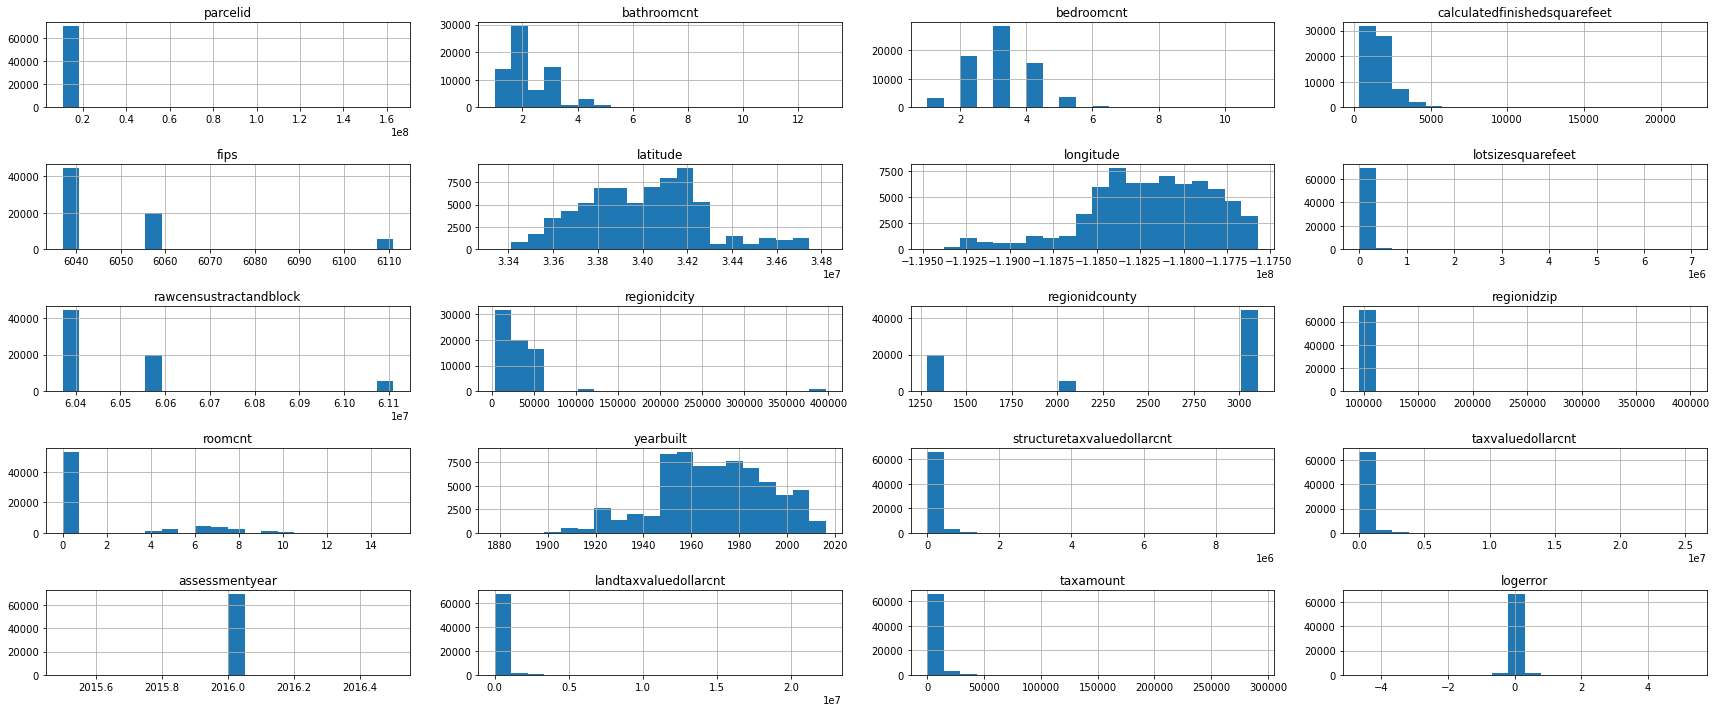

In [31]:
df.hist(figsize=(24, 10), bins=20)
plt.tight_layout()